### Importing Packages

In [ ]:
pip install langdetect

In [ ]:
pip install deep-translator

In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import seaborn as sns
import re
import string
from collections import Counter, defaultdict
from typing import Union, List

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)
from langdetect import detect
from deep_translator import GoogleTranslator

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('english'))
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from tqdm import tqdm
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from transformers import BertTokenizer
from sklearn.model_selection import train_test_split

import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset
import os
import random
from pathlib import Path
import json

from transformers import BertForSequenceClassification

nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Project Scope

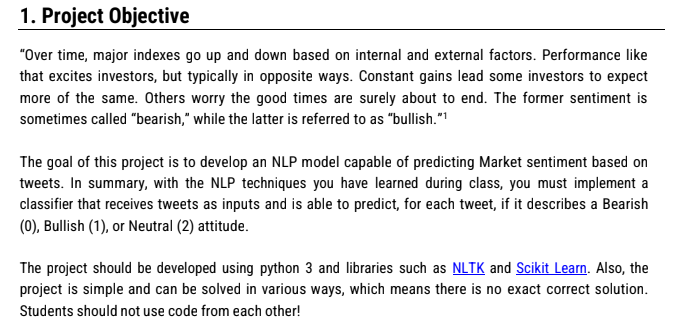

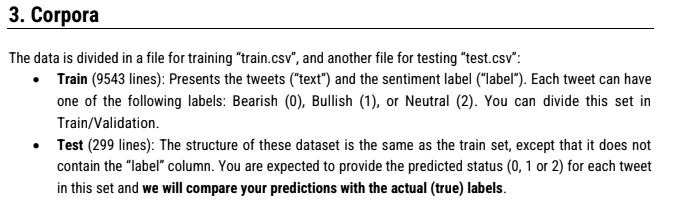

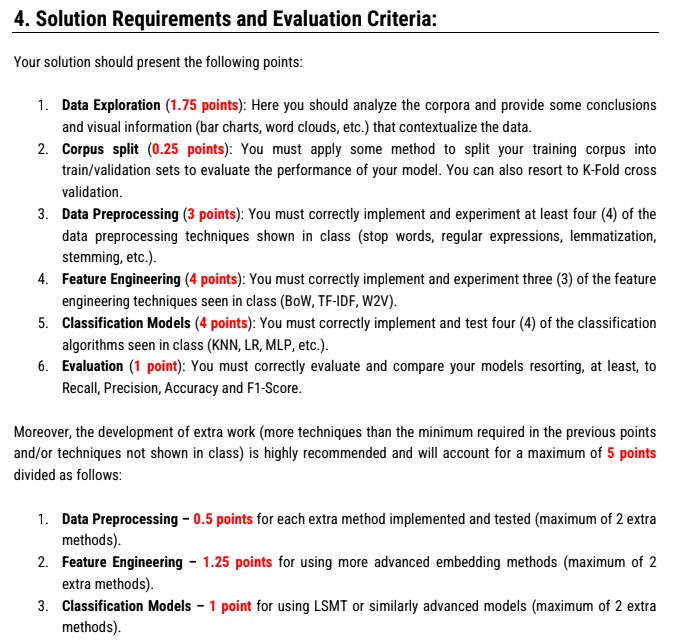

### Helper Functions

In [ ]:
class CleanText():
    """ clearing text except digits () . , word character """

    def __init__(self, clean_pattern = r"[^A-ZĞÜŞİÖÇIa-zğüı'şöç.\"',()&]"):
        self.clean_pattern =clean_pattern

    def __call__(self, text: Union[str, list]) -> List[List[str]]:

        if isinstance(text, str):
            docs = [[text]]

        if isinstance(text, list):
            docs = text

        text = [[re.sub(self.clean_pattern, " ", sent) for sent in sents] for sents in docs]

        return text

def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

def has_url(text):
    return 1 if re.search(r'http\S+|www\S+', text) else 0

def remove_possessives(text):
    # Use regex to remove "'s" and "'" at the end of words
    return re.sub(r"\b(?:'s|’s)\b|\b(?:'|’)\b", "", text)

def english_translation(text):
    return GoogleTranslator(source='auto', target='en').translate(text)

# # Function to remove stopwords
# def remove_stopwords(text):
#     return " ".join([word for word in text.split() if word.lower() not in stopWords_nltk])

negative_words = {'no', 'not','none','neither','never','nobody','nothing','nowhere',"doesn't","isn't","wasn't","shouldn't","won't","can't","couldn't","don't","haven't","hasn't","hadn't","aren't","weren't","wouldn't","daren't","needn't","didn't",'without','against','negative','deny','reject','refuse','decline','unhappy','sad','miserable','hopeless','worthless','useless','futile','disagree','oppose','contrary','contradict','disapprove','dissatisfied','objection','unsatisfactory','unpleasant','regret','resent','lament','mourn','grieve','bemoan','despise','loathe','detract','abhor','dread','fear','worry','anxiety','sorrow','gloom','melancholy','dismay','disheartened','despair','dislike','aversion','antipathy','hate','disdain'}

def remove_stopwords(sentence, stopwords_list):
    tokens = nltk.word_tokenize(sentence)
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords_list]
    return ' '.join(filtered_tokens)

clean = CleanText()

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## 1.) Corpus Split

In [ ]:
# Train DataFrame
data = pd.read_csv("/content/drive/MyDrive/Nova Ims/Text Mining/Project Data/train.csv")

final_test = pd.read_csv("/content/drive/MyDrive/Nova Ims/Text Mining/Project Data/test.csv")

# I will have to use only the "df" dataframe to train and pick my model. The Test Dataframe will be only used in the end of the project to predict.

df, df_test = train_test_split(data, random_state = 42, stratify = data["label"].values)

df.head()

print("Shape of Training Data:", df.shape)
print("Shape of Test Data:", df_test.shape)
print("Shape of Final Test Data:", final_test.shape)

Shape of Training Data: (7157, 2)
Shape of Test Data: (2386, 2)
Shape of Final Test Data: (2388, 2)


In [ ]:
# Printing the Columns Names

df.columns

Index(['text', 'label'], dtype='object')

## 2.) Exploratory Data Analysis --> Raw Data

#### Word Cloud on the Corpus

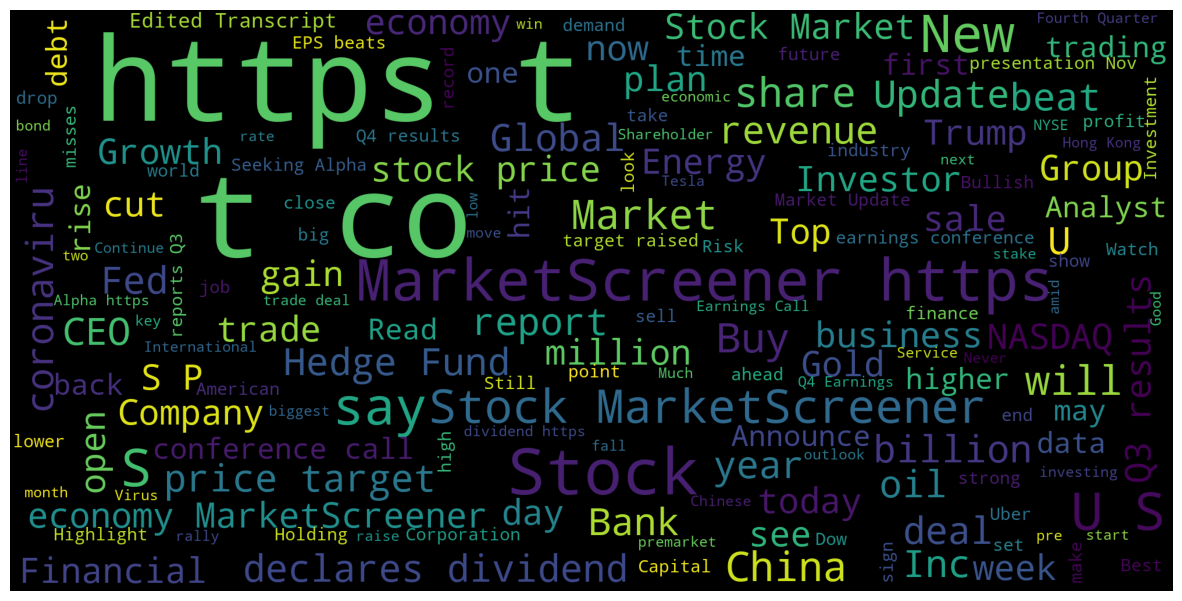

In [ ]:
# Computing a Word Cloud for the Training Data

def word_cloud(data, title = None):
    wordcloud = WordCloud(
        background_color = "black",
        max_words = 200,
        max_font_size = 40,
        scale = 5,
        random_state = 42
    ).generate(" ".join(data))

    fig = plt.figure(1, figsize = (15, 15))
    plt.axis('off')
    if title:
        fig.subtitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

word_cloud(df["text"].values)

#### Target Counting

In [ ]:
# Adding Text Labels for better visualization of the target counts

def label2name(x):
    if x == 0:
        return "Bearish"
    if x == 1:
        return "Bullish"
    if x == 2:
        return "Neutral"

df["label_name"] = df["label"].apply(lambda x: label2name(x))

df.head()

,text,label,label_name
337,UBS raises Peloton’s price target to $40,1,Bullish
3918,#SouthAfrica suffers among the highest levels of inequality in the world. #Inequality manifests itself through a sk... https://t.co/388qLKScln,2,Neutral
9301,"Carnival $CCL shares climbed after a Saudi investment fund bought an 8.2% stake, valued at nearly $370 million, in… https://t.co/fLj0pBwTzk",1,Bullish
1085,$COP - ConocoPhillips (COP) Investor Presentation - Slideshow. Keep reading: https://t.co/iSocNAQhv9 #investing #markets #finance,2,Neutral
6926,"Stocks rallied for a second day, with the S&P 500 Index venturing briefly into bullish territory https://t.co/XvcR80ej7I",1,Bullish


In [ ]:
# Checking the Target Balance of our Training Dataset

fig = make_subplots(rows = 1, cols = 2, specs = [[{"type": "pie"}, {"type": "bar"}]])

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
)

# Defining the colors for the Market Sentiment Labels

colors = ["gold", "green", "red"]

fig.add_trace(go.Pie(labels = df["label_name"].value_counts().index, values = df["label"].value_counts().values), 1, 1)

fig.update_traces(hoverinfo = 'label+percent', textfont_size = 20, marker = dict(colors = colors, line = dict(color="#000000", width = 2)))

fig.add_trace(go.Bar(x = df["label_name"].value_counts().index, y = df["label"].value_counts().values, marker_color = colors), 1, 2)

fig.show()

#### Analyzing the Token Count cosnidering Different Labels

In [ ]:
# Initializing the Bert tokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case = True)

In [ ]:
# Tokenizing the Data and checking the lenght of the tokens

df["bert_token_lenght"] = df["text"].apply(lambda x: len(tokenizer(x, add_special_tokens = False)["input_ids"]))

# Checking the number of characters

df['Character_Count'] = df['text'].apply(lambda x: len(str(x)))

# Inserting this new column before the labels just for organizing the data

bert_token_lenght = df.pop("bert_token_lenght")
Character_Count = df.pop("Character_Count")

df.insert(1, "bert_token_lenght", bert_token_lenght)
df.insert(1, "Character_Count", Character_Count)

df.head()

,text,Character_Count,bert_token_lenght,label,label_name
337,UBS raises Peloton’s price target to $40,40,13,1,Bullish
3918,#SouthAfrica suffers among the highest levels of inequality in the world. #Inequality manifests itself through a sk... https://t.co/388qLKScln,142,40,2,Neutral
9301,"Carnival $CCL shares climbed after a Saudi investment fund bought an 8.2% stake, valued at nearly $370 million, in… https://t.co/fLj0pBwTzk",139,44,1,Bullish
1085,$COP - ConocoPhillips (COP) Investor Presentation - Slideshow. Keep reading: https://t.co/iSocNAQhv9 #investing #markets #finance,129,41,2,Neutral
6926,"Stocks rallied for a second day, with the S&P 500 Index venturing briefly into bullish territory https://t.co/XvcR80ej7I",120,35,1,Bullish


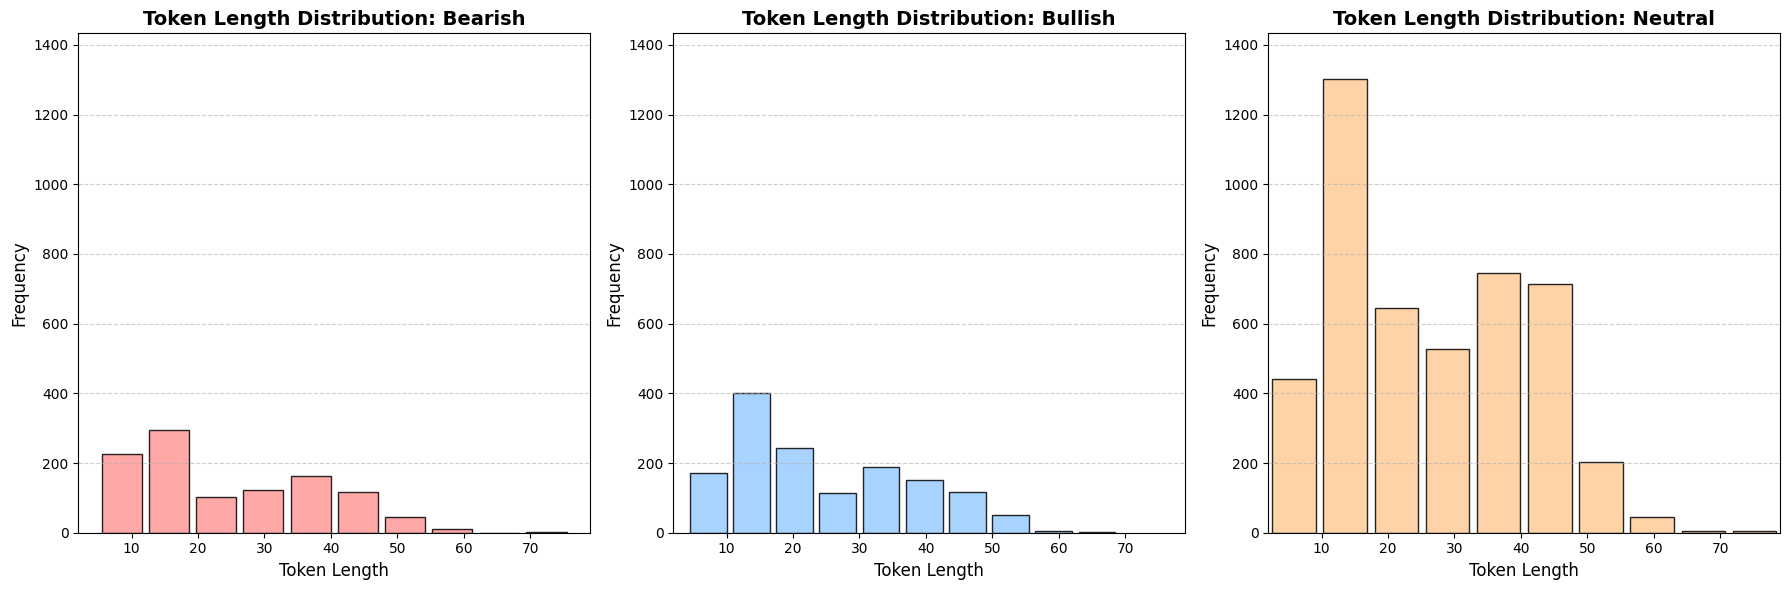

In [ ]:
# Creating histograms for each label regarding token distribution

labels = ["Bearish", "Bullish", "Neutral"] # 0: Bearish; 1: Bullish; 2: Neutral;
colors = ['#FF9999', '#99CCFF', '#FFCC99']  # Use distinct colors for each label

# Determine global range for x and y axes
x_min = df['bert_token_lenght'].min()
x_max = df['bert_token_lenght'].max()
y_max = df.groupby('label_name')['bert_token_lenght'].apply(lambda x: np.histogram(x, bins=10)[0].max()).max()
y_margin = y_max * 0.1

plt.figure(figsize=(18, 6))

for i, label in enumerate(labels):
    plt.subplot(1, len(labels), i + 1)
    subset = df[df['label_name'] == label]
    plt.hist(subset['bert_token_lenght'], bins=10, alpha=0.85, color=colors[i], edgecolor='black', rwidth=0.85)
    plt.title(f"Token Length Distribution: {label}", fontsize=14, fontweight='bold')
    plt.xlabel("Token Length", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', alpha=0.6, linestyle='--')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim(x_min, x_max)
    plt.ylim(0, y_max + y_margin)  # Add margin to y-axis

plt.tight_layout()
plt.show()

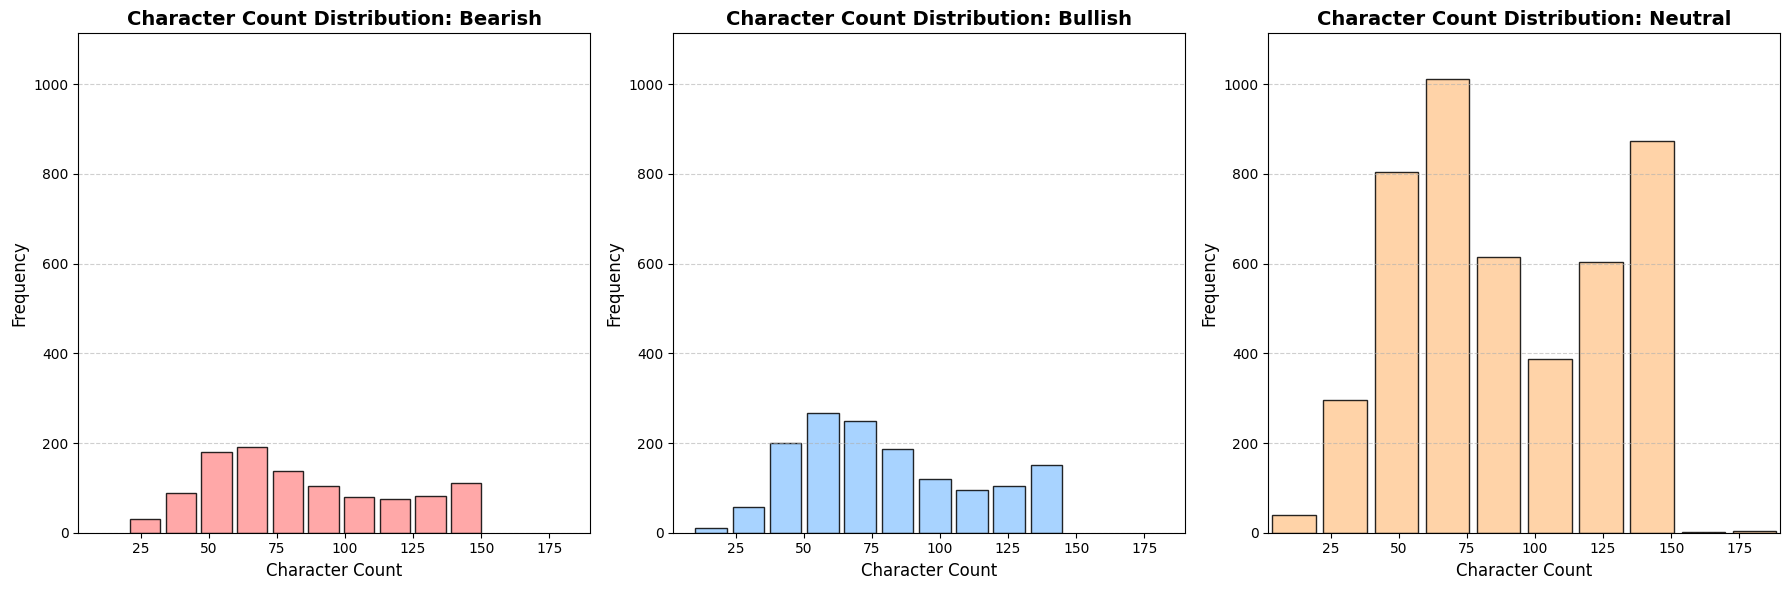

In [ ]:
# Creating histograms for each label regarding Character Lenght Distribution

plt.figure(figsize=(18, 6))
colors = ['#FF9999', '#99CCFF', '#FFCC99']

# Determine the global range for x and y axes
x_min = df['Character_Count'].min()
x_max = df['Character_Count'].max()
y_max = df.groupby('label_name')['Character_Count'].apply(lambda x: np.histogram(x, bins=10)[0].max()).max()
y_margin = y_max * 0.1

for i, label in enumerate(labels):
    plt.subplot(1, len(labels), i + 1)
    subset = df[df['label_name'] == label]
    plt.hist(subset['Character_Count'], bins=10, alpha=0.85, color=colors[i], edgecolor='black', rwidth=0.85)
    plt.title(f"Character Count Distribution: {label}", fontsize=14, fontweight='bold')
    plt.xlabel("Character Count", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', alpha=0.6, linestyle='--')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim(x_min, x_max)
    plt.ylim(0, y_max + y_margin)  # Add margin to y-axis

plt.tight_layout()
plt.show()

#### Finding the most Common Words

In [ ]:
df["tokenized_text"] = df["text"].apply(lambda x: remove_punct(x))

# Tokenizing the data with a simple tokenizer to find the most common words

df["tokenized_text"] = df["tokenized_text"].apply(lambda x: word_tokenize(x))
df["tokenized_text"] = df["tokenized_text"].apply(lambda x: ' '.join(x))

df.head()

,text,Character_Count,bert_token_lenght,label,label_name,tokenized_text
337,UBS raises Peloton’s price target to $40,40,13,1,Bullish,UBS raises Peloton ’ s price target to 40
3918,#SouthAfrica suffers among the highest levels of inequality in the world. #Inequality manifests itself through a sk... https://t.co/388qLKScln,142,40,2,Neutral,SouthAfrica suffers among the highest levels of inequality in the world Inequality manifests itself through a sk httpstco388qLKScln
9301,"Carnival $CCL shares climbed after a Saudi investment fund bought an 8.2% stake, valued at nearly $370 million, in… https://t.co/fLj0pBwTzk",139,44,1,Bullish,Carnival CCL shares climbed after a Saudi investment fund bought an 82 stake valued at nearly 370 million in… httpstcofLj0pBwTzk
1085,$COP - ConocoPhillips (COP) Investor Presentation - Slideshow. Keep reading: https://t.co/iSocNAQhv9 #investing #markets #finance,129,41,2,Neutral,COP ConocoPhillips COP Investor Presentation Slideshow Keep reading httpstcoiSocNAQhv9 investing markets finance
6926,"Stocks rallied for a second day, with the S&P 500 Index venturing briefly into bullish territory https://t.co/XvcR80ej7I",120,35,1,Bullish,Stocks rallied for a second day with the SP 500 Index venturing briefly into bullish territory httpstcoXvcR80ej7I


In [ ]:
texts = df['tokenized_text']
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:30]:
    if word not in stopWords_nltk:
        x.append(word)
        y.append(count)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',  marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Most common Word',))

fig.update_layout( title={
        'text': "Most Common Words",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

fig.show()

#### Most Common N-Grams

In [ ]:
# Getting the top Uni-grams for eah label

fig = make_subplots(rows=1, cols=3)
title_ = ["Bearish", "Bullish", "Neutral"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []

    for word, count in most[:30]:
        if word not in stopWords_nltk:
            x.append(word)
            y.append(count)

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common unigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ),)


fig.show()

In [ ]:
# Getting the top bigrams for each label

def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:15]

fig = make_subplots(rows=1, cols=3)

title_ = ["Bearish", "Bullish", "Neutral"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)


fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common bigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))
fig.show()

In [ ]:
# Getting the top Trigrams for each label

fig = make_subplots(rows=1, cols=3)
title_ = ["Bearish", "Bullish", "Neutral"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    top_n_bigrams = _get_top_ngram(texts, 3)[:15]
    x, y = map(list, zip(*top_n_bigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1),

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common trigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))

fig.show()

#### Exploring the Relevance of having URls

label
0    44.269871
1    39.112344
2    49.687028
Name: has_url, dtype: float64


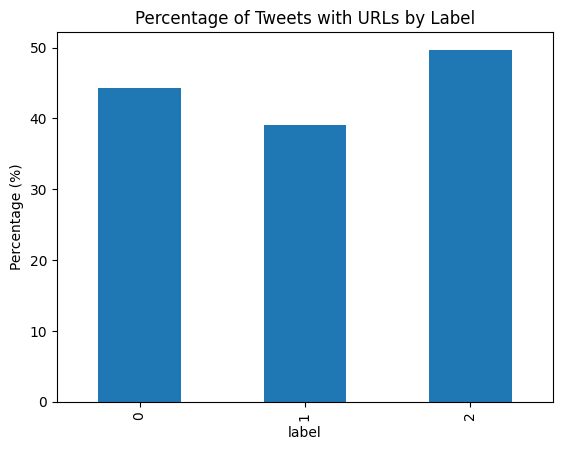

In [ ]:
# Add the 'has_url' feature

df['has_url'] = df['text'].apply(has_url)
df_test["has_url"] = df_test["text"].apply(has_url)

# Calculate the percentage of tweets with URLs for each label
url_analysis = df.groupby('label')['has_url'].mean() * 100
print(url_analysis)

# Visualize the distribution
import matplotlib.pyplot as plt

url_analysis.plot(kind='bar')
plt.title('Percentage of Tweets with URLs by Label')
plt.ylabel('Percentage (%)')
plt.show()

### Exploring Number of Different Languages

In [ ]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Creating a column with the language

df['detected_language'] = df['text'].apply(detect_language)
df_test['detected_language'] = df_test['text'].apply(detect_language)
final_test['detected_language'] = final_test['text'].apply(detect_language)

df['detected_language'].unique()

array(['en', 'it', 'ca', 'sv', 'fr', 'da', 'es', 'nl', 'ro', 'sk', 'de',
       'tl', 'so', 'pt', 'no', 'pl', 'af', 'unknown', 'et', 'ja', 'id',
       'vi', 'hu', 'hr', 'sq', 'cs', 'fi', 'sw', 'tr', 'zh-cn', 'sl',
       'cy'], dtype=object)

## 3.) Data Preprocessing

In [ ]:
df_train = df.copy()

def preprocessing(data):

    # Removing URL's from the data

    data["clean_text"] = data["text"].apply(lambda x: remove_urls(x))

    # Translating the Data to English

    data["clean_text"] = data.apply(lambda row: english_translation(row["clean_text"]) if row["detected_language"] != "en" else row["clean_text"], axis=1)

    data["clean_text"] = data["clean_text"].astype(str)

    # Remove stop words

    data["clean_text"] = data["clean_text"].apply(lambda x: remove_stopwords(x, stopWords_nltk))

    # Remove possessives from words: Example --> "Here's" is now "Here"

    data["clean_text"] = data["clean_text"].apply(lambda x: remove_possessives(x))

    # I will choose one of the following two methods:

    # Lemmatization of words
    lemma = WordNetLemmatizer()
    data["clean_text"] = data["clean_text"].apply(lambda x: " ".join([lemma.lemmatize(word) for word in word_tokenize(x)]))

    # Stemming of words

    # stemmer = SnowballStemmer('english')
    # data["clean_text"] = data["clean_text"].apply(lambda x: " ".join([stemmer.stem(word) for word in word_tokenize(x)]))

    # Removing punctuation, cleaning text from stange symbols, removing emojis and lowercasing the text

    data["clean_text"] = data["clean_text"].apply(lambda x: remove_punct(clean(remove_emoji(x).lower())[0][0]))

    return data

def preprocessing_transformers(data):

    # Removing URL's from the data

    data["clean_text"] = data["text"].apply(lambda x: remove_urls(x))

    # Translating the Data to English

    data["clean_text"] = data.apply(lambda row: english_translation(row["clean_text"]) if row["detected_language"] != "en" else row["clean_text"], axis=1)

    data["clean_text"] = data["clean_text"].astype(str)

    # Remove stop words that shouldnt have any meaning - we keep negation words

    clean_stop_words = stopWords_nltk - negative_words

    data["clean_text"] = data["clean_text"].apply(lambda x: remove_stopwords(x, clean_stop_words))

    # Lemmatization of words
    lemma = WordNetLemmatizer()
    data["clean_text"] = data["clean_text"].apply(lambda x: " ".join([lemma.lemmatize(word) for word in word_tokenize(x)]))

    # Removing punctuation, cleaning text from stange symbols, removing emojis and lowercasing the text

    data["clean_text"] = data["clean_text"].apply(lambda x: remove_emoji(x).lower())

    return data

df_train_clean = preprocessing_transformers(df_train)
df_test_clean = preprocessing_transformers(df_test)
final_test_clean = preprocessing_transformers(final_test)

df_train_clean.head()

,text,Character_Count,bert_token_lenght,label,label_name,tokenized_text,has_url,detected_language,clean_text
337,UBS raises Peloton’s price target to $40,40,13,1,Bullish,UBS raises Peloton ’ s price target to 40,0,en,ubs raise peloton ’ price target $ 40
3918,#SouthAfrica suffers among the highest levels of inequality in the world. #Inequality manifests itself through a sk... https://t.co/388qLKScln,142,40,2,Neutral,SouthAfrica suffers among the highest levels of inequality in the world Inequality manifests itself through a sk httpstco388qLKScln,1,en,# southafrica suffers among highest level inequality world . # inequality manifest sk ...
9301,"Carnival $CCL shares climbed after a Saudi investment fund bought an 8.2% stake, valued at nearly $370 million, in… https://t.co/fLj0pBwTzk",139,44,1,Bullish,Carnival CCL shares climbed after a Saudi investment fund bought an 82 stake valued at nearly 370 million in… httpstcofLj0pBwTzk,1,en,"carnival $ ccl share climbed saudi investment fund bought 8.2 % stake , valued nearly $ 370 million , in…"
1085,$COP - ConocoPhillips (COP) Investor Presentation - Slideshow. Keep reading: https://t.co/iSocNAQhv9 #investing #markets #finance,129,41,2,Neutral,COP ConocoPhillips COP Investor Presentation Slideshow Keep reading httpstcoiSocNAQhv9 investing markets finance,1,en,$ cop - conocophillips ( cop ) investor presentation - slideshow . keep reading : # investing # market # finance
6926,"Stocks rallied for a second day, with the S&P 500 Index venturing briefly into bullish territory https://t.co/XvcR80ej7I",120,35,1,Bullish,Stocks rallied for a second day with the SP 500 Index venturing briefly into bullish territory httpstcoXvcR80ej7I,1,en,"stocks rallied second day , & p 500 index venturing briefly bullish territory"


In [ ]:
df_test_clean.head()

,text,label,has_url,detected_language,clean_text
5427,We want your story. Click here for a secure link to Bloomberg reporters https://t.co/4hcRhyMlWZ https://t.co/0Uf2tgDQ7A,2,1,en,want story . click secure link bloomberg reporter
207,"Bull sees 2020 upsides for MU, WDC",1,0,en,"bull see 2020 upside mu , wdc"
3756,"Investors should prepare for a coronavirus-induced 'vicious spiral' more than twice as bad as the financial crisis,… https://t.co/DfPJxkxz36",0,1,en,"investors prepare coronavirus-induced 'vicious spiral ' twice bad financial crisis , …"
1713,"NHB Tweaks Rs 30,000 Crore Liquidity Infusion Facility For Housing Finance Companies",2,0,en,"nhb tweaks rs 30,000 crore liquidity infusion facility housing finance companies"
8941,$BXC (-3.5% pre) Form S-3 BlueLinx Holdings Inc. https://t.co/3hpRHqTF4a,0,1,en,$ bxc ( -3.5 % pre ) form s-3 bluelinx holdings inc .


In [ ]:
final_test_clean.head()

,id,text,detected_language,clean_text
0,0,"ETF assets to surge tenfold in 10 years to $50 trillion, Bank of America predicts",en,"etf asset surge tenfold 10 year $ 50 trillion , bank america predicts"
1,1,Here’s What Hedge Funds Think Evolution Petroleum Corporation (EPM),en,’ hedge funds think evolution petroleum corporation ( epm )
2,2,$PVH - Phillips-Van Heusen Q3 2020 Earnings Preview https://t.co/kNhCYwVnBX,en,$ pvh - phillips-van heusen q3 2020 earnings preview
3,3,"China is in the process of waiving retaliatory tariffs on imports of U.S. pork and soy by domestic companies, a pro… https://t.co/08mZU9TrBX",en,"china process waiving retaliatory tariff import u.s. pork soy domestic company , pro…"
4,4,"Highlight: “When growth is scarce, investors seem very willing to pay up for growth stock"" @PNCBank's… https://t.co/rO4fBOkBG9",en,"highlight : “ growth scarce , investor seem willing pay growth stock `` @ pncbank's…"


### Visually Organizing the Data

In [ ]:
# Train

df_train_clean.drop(columns =  ["tokenized_text"], inplace = True)

clean_text = df_train_clean.pop("clean_text")
label = df_train_clean.pop("label")
label_name = df_train_clean.pop("label_name")

df_train_clean.insert(1, "clean_text", clean_text)
df_train_clean.insert(len(df_train_clean.columns), "label", label)
df_train_clean.insert(len(df_train_clean.columns), "label_name", label_name)

df_train_clean.drop(columns = ["Character_Count", "bert_token_lenght", "label_name", "detected_language"], inplace = True)

# Test

clean_text = df_test_clean.pop("clean_text")
label = df_test_clean.pop("label")

df_test_clean.insert(1, "clean_text", clean_text)
df_test_clean.insert(len(df_test_clean.columns), "label", label)

df_test_clean.drop(columns = ["detected_language"], inplace = True)

# Final Test

clean_text = final_test_clean.pop("clean_text")

final_test_clean.insert(1, "clean_text", clean_text)

final_test_clean.drop(columns = ["detected_language"], inplace = True)

In [ ]:
df_train_clean.head()

,text,clean_text,has_url,label
337,UBS raises Peloton’s price target to $40,ubs raise peloton ’ price target $ 40,0,1
3918,#SouthAfrica suffers among the highest levels of inequality in the world. #Inequality manifests itself through a sk... https://t.co/388qLKScln,# southafrica suffers among highest level inequality world . # inequality manifest sk ...,1,2
9301,"Carnival $CCL shares climbed after a Saudi investment fund bought an 8.2% stake, valued at nearly $370 million, in… https://t.co/fLj0pBwTzk","carnival $ ccl share climbed saudi investment fund bought 8.2 % stake , valued nearly $ 370 million , in…",1,1
1085,$COP - ConocoPhillips (COP) Investor Presentation - Slideshow. Keep reading: https://t.co/iSocNAQhv9 #investing #markets #finance,$ cop - conocophillips ( cop ) investor presentation - slideshow . keep reading : # investing # market # finance,1,2
6926,"Stocks rallied for a second day, with the S&P 500 Index venturing briefly into bullish territory https://t.co/XvcR80ej7I","stocks rallied second day , & p 500 index venturing briefly bullish territory",1,1


In [ ]:
df_test_clean.head()

,text,clean_text,has_url,label
5427,We want your story. Click here for a secure link to Bloomberg reporters https://t.co/4hcRhyMlWZ https://t.co/0Uf2tgDQ7A,want story . click secure link bloomberg reporter,1,2
207,"Bull sees 2020 upsides for MU, WDC","bull see 2020 upside mu , wdc",0,1
3756,"Investors should prepare for a coronavirus-induced 'vicious spiral' more than twice as bad as the financial crisis,… https://t.co/DfPJxkxz36","investors prepare coronavirus-induced 'vicious spiral ' twice bad financial crisis , …",1,0
1713,"NHB Tweaks Rs 30,000 Crore Liquidity Infusion Facility For Housing Finance Companies","nhb tweaks rs 30,000 crore liquidity infusion facility housing finance companies",0,2
8941,$BXC (-3.5% pre) Form S-3 BlueLinx Holdings Inc. https://t.co/3hpRHqTF4a,$ bxc ( -3.5 % pre ) form s-3 bluelinx holdings inc .,1,0


In [ ]:
final_test_clean.head()

,id,clean_text,text
0,0,"etf asset surge tenfold 10 year $ 50 trillion , bank america predicts","ETF assets to surge tenfold in 10 years to $50 trillion, Bank of America predicts"
1,1,’ hedge funds think evolution petroleum corporation ( epm ),Here’s What Hedge Funds Think Evolution Petroleum Corporation (EPM)
2,2,$ pvh - phillips-van heusen q3 2020 earnings preview,$PVH - Phillips-Van Heusen Q3 2020 Earnings Preview https://t.co/kNhCYwVnBX
3,3,"china process waiving retaliatory tariff import u.s. pork soy domestic company , pro…","China is in the process of waiving retaliatory tariffs on imports of U.S. pork and soy by domestic companies, a pro… https://t.co/08mZU9TrBX"
4,4,"highlight : “ growth scarce , investor seem willing pay growth stock `` @ pncbank's…","Highlight: “When growth is scarce, investors seem very willing to pay up for growth stock"" @PNCBank's… https://t.co/rO4fBOkBG9"


## 4.) Feature Engieering

In [ ]:
# Training target split

X_train = df_train_clean.drop(columns = "label")
y_train = df_train_clean["label"].to_numpy()

# Test target split

X_test = df_test_clean.drop(columns = "label")
y_test = df_test_clean["label"].to_numpy()

### BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(binary=True)

#Train

X_train_BOW = bow.fit_transform(X_train["clean_text"])

# test

X_test_BOW = bow.transform(X_test["clean_text"])

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.8)

X_train_tfidf = tfidf.fit_transform(X_train["clean_text"])
X_test_tfidf = tfidf.transform(X_test["clean_text"])

# Convert TF-IDF result to a DataFrame

# Train

X_train_tfidf = pd.DataFrame(
    X_train_tfidf.toarray(),
    columns=tfidf.get_feature_names_out(),
    index=X_train.index
)

# Test

X_test_tfidf = pd.DataFrame(
    X_test_tfidf.toarray(),
    columns=tfidf.get_feature_names_out(),
    index=X_test.index
)

# Add the additional columns ("has_url" and "detected_language") to the TF-IDF DataFrame
X_train_tfidf = pd.concat([X_train["has_url"], X_train_tfidf], axis=1).to_numpy()
X_test_tfidf = pd.concat([X_test["has_url"], X_test_tfidf], axis=1).to_numpy()

In [ ]:
X_train_tfidf.shape

(7157, 12902)

In [ ]:
X_test_tfidf.shape

(2386, 12902)

### W2V

In [ ]:
!pip install gensim
import gensim.downloader

print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
# Glove Twitter Embeddings size 25

word2vec_model = gensim.downloader.load('glove-twitter-25')

In [ ]:
def corpus2vec(corpus, w2v_model):
    """
    Converts a corpus into document embeddings by averaging word embeddings.

    Args:
        corpus (list of str): List of tweets (cleaned text).
        w2v_model (gensim Word2Vec or GloVe model): Pre-trained word embedding model.

    Returns:
        np.array: Document-level embeddings for the corpus.
    """
    corpus_vec = []

    for document in tqdm(corpus, desc="Processing tweets"):
        doc_vectors = []

        # Get word vectors for each word in the document
        for word in document.split():
            if word in w2v_model.key_to_index:  # Check if word exists in the model
                doc_vectors.append(w2v_model[word])

        # Compute the average vector for the document
        if doc_vectors:
            doc_embedding = np.mean(doc_vectors, axis=0)
        else:
            doc_embedding = np.zeros(w2v_model.vector_size)  # Fallback for empty documents

        corpus_vec.append(doc_embedding)

    return np.array(corpus_vec)

# Step 3: Combine Word2Vec embeddings with the "has_url" column
def prepare_features(data, w2v_model):
    """
    Prepares features by combining Word2Vec embeddings with the 'has_url' binary column.

    Args:
        data (pd.DataFrame): DataFrame with 'clean_text' and 'has_url' columns.
        w2v_model (gensim Word2Vec or GloVe model): Pre-trained word embedding model.

    Returns:
        np.array: Combined feature matrix (Word2Vec embeddings + 'has_url').
    """
    # Compute Word2Vec embeddings for the 'clean_text' column
    text_embeddings = corpus2vec(data['clean_text'], w2v_model)

    # Convert 'has_url' column to a NumPy array
    has_url_array = data['has_url'].values.reshape(-1, 1)  # Reshape to make it 2D for concatenation

    # Combine Word2Vec embeddings with 'has_url'
    combined_features = np.hstack((text_embeddings, has_url_array))

    return combined_features

X_train_W2V = prepare_features(X_train, word2vec_model)
X_test_W2V = prepare_features(X_test, word2vec_model)

Processing tweets:   0%|          | 0/7157 [00:00<?, ?it/s]

Processing tweets:   0%|          | 0/2386 [00:00<?, ?it/s]

In [ ]:
X_train_W2V.shape

(7157, 26)

In [ ]:
X_test_W2V.shape

(2386, 26)

### Transformers Tokenization - "Clean_text"

#### BertTokenizer

In [ ]:
# class Config():
#     seed_val = 17
#     device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#     epochs = 5
#     batch_size = 6
#     seq_length = 512
#     lr = 2e-5
#     eps = 1e-8
#     pretrained_model = 'bert-base-uncased'
#     test_size=0.15
#     random_state=42
#     add_special_tokens=True
#     return_attention_mask=True
#     pad_to_max_length=True
#     do_lower_case=False
#     return_tensors='pt'

# config = Config()

# # params will be saved after training
# params = {"seed_val": config.seed_val,
#     "device":str(config.device),
#     "epochs":config.epochs,
#     "batch_size":config.batch_size,
#     "seq_length":config.seq_length,
#     "lr":config.lr,
#     "eps":config.eps,
#     "pretrained_model": config.pretrained_model,
#     "test_size":config.test_size,
#     "random_state":config.random_state,
#     "add_special_tokens":config.add_special_tokens,
#     "return_attention_mask":config.return_attention_mask,
#     "pad_to_max_length":config.pad_to_max_length,
#     "do_lower_case":config.do_lower_case,
#     "return_tensors":config.return_tensors,
#          }

# # set random seed and device
# import random

# device = config.device

# random.seed(config.seed_val)
# np.random.seed(config.seed_val)
# torch.manual_seed(config.seed_val)
# torch.cuda.manual_seed_all(config.seed_val)

In [ ]:
# # create tokenizer
# tokenizer = BertTokenizer.from_pretrained(config.pretrained_model,
#                                           do_lower_case=config.do_lower_case)

# encoded_data_train = tokenizer.batch_encode_plus(
#     df_train_clean["clean_text"].values,
#     add_special_tokens=config.add_special_tokens,
#     return_attention_mask=config.return_attention_mask,
#     pad_to_max_length=config.pad_to_max_length,
#     max_length=config.seq_length,
#     return_tensors=config.return_tensors
# )
# encoded_data_val = tokenizer.batch_encode_plus(
#     df_test_clean["clean_text"].values,
#     add_special_tokens=config.add_special_tokens,
#     return_attention_mask=config.return_attention_mask,
#     pad_to_max_length=config.pad_to_max_length,
#     max_length=config.seq_length,
#     return_tensors=config.return_tensors
# )

# input_ids_train = encoded_data_train['input_ids']
# attention_masks_train = encoded_data_train['attention_mask']
# labels_train = torch.tensor(df_train_clean["label"].values)

# input_ids_val = encoded_data_val['input_ids']
# attention_masks_val = encoded_data_val['attention_mask']
# labels_val = torch.tensor(df_test_clean["label"].values)

# df_train_bert = TensorDataset(input_ids_train, attention_masks_train, labels_train)
# df_val_bert = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


#### RobertaTokenizer

In [ ]:
# class Config():
#     seed_val = 17
#     device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#     epochs = 5
#     batch_size = 6
#     seq_length = 512
#     lr = 2e-5
#     eps = 1e-8
#     pretrained_model = 'roberta-base'
#     test_size=0.15
#     random_state=42
#     add_special_tokens = True
#     return_attention_mask = True
#     pad_to_max_length = True
#     max_length = 512
#     return_tensors = 'pt'

# config = Config()

# # params will be saved after training
# params = {
#     "seed_val": config.seed_val,
#     "device": str(config.device),
#     "epochs": config.epochs,
#     "batch_size": config.batch_size,
#     "seq_length": config.seq_length,
#     "lr": config.lr,
#     "eps": config.eps,
#     "pretrained_model": config.pretrained_model,
#     "test_size": config.test_size,
#     "random_state": config.random_state,
#     "add_special_tokens": config.add_special_tokens,
#     "return_attention_mask": config.return_attention_mask,
#     "pad_to_max_length": config.pad_to_max_length,
#     "return_tensors": config.return_tensors,
# }

# # set random seed and device
# import random

# device = config.device

# random.seed(config.seed_val)
# np.random.seed(config.seed_val)
# torch.manual_seed(config.seed_val)
# torch.cuda.manual_seed_all(config.seed_val)

In [ ]:
# from transformers import RobertaTokenizer

# # Initialize RoBERTa tokenizer
# tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# # Tokenize training data
# encoded_data_train = tokenizer.batch_encode_plus(
#     df_train_clean["clean_text"].values,
#     add_special_tokens=True,
#     return_attention_mask=True,
#     pad_to_max_length=True,
#     max_length=128,
#     return_tensors="pt"
# )

# # Tokenize validation data
# encoded_data_val = tokenizer.batch_encode_plus(
#     df_test_clean["clean_text"].values,
#     add_special_tokens=True,
#     return_attention_mask=True,
#     pad_to_max_length=True,
#     max_length=128,
#     return_tensors="pt"
# )

# # Extract input IDs, attention masks, and labels
# input_ids_train = encoded_data_train["input_ids"]
# attention_masks_train = encoded_data_train["attention_mask"]
# labels_train = torch.tensor(df_train_clean["label"].values)

# input_ids_val = encoded_data_val["input_ids"]
# attention_masks_val = encoded_data_val["attention_mask"]
# labels_val = torch.tensor(df_test_clean["label"].values)

# # Create TensorDatasets
# df_train_bert = TensorDataset(input_ids_train, attention_masks_train, labels_train)
# df_val_bert = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


### Transformers Tokenization - "Text"

#### BertTokenizer

In [ ]:
# class Config():
#     seed_val = 17
#     device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#     epochs = 5
#     batch_size = 6
#     seq_length = 512
#     lr = 2e-5
#     eps = 1e-8
#     pretrained_model = 'bert-base-uncased'
#     test_size=0.15
#     random_state=42
#     add_special_tokens=True
#     return_attention_mask=True
#     pad_to_max_length=True
#     do_lower_case=False
#     return_tensors='pt'

# config = Config()

# # params will be saved after training
# params = {"seed_val": config.seed_val,
#     "device":str(config.device),
#     "epochs":config.epochs,
#     "batch_size":config.batch_size,
#     "seq_length":config.seq_length,
#     "lr":config.lr,
#     "eps":config.eps,
#     "pretrained_model": config.pretrained_model,
#     "test_size":config.test_size,
#     "random_state":config.random_state,
#     "add_special_tokens":config.add_special_tokens,
#     "return_attention_mask":config.return_attention_mask,
#     "pad_to_max_length":config.pad_to_max_length,
#     "do_lower_case":config.do_lower_case,
#     "return_tensors":config.return_tensors,
#          }

# # set random seed and device
# import random

# device = config.device

# random.seed(config.seed_val)
# np.random.seed(config.seed_val)
# torch.manual_seed(config.seed_val)
# torch.cuda.manual_seed_all(config.seed_val)

In [ ]:
# # create tokenizer
# tokenizer = BertTokenizer.from_pretrained(config.pretrained_model,
#                                           do_lower_case=config.do_lower_case)

# encoded_data_train = tokenizer.batch_encode_plus(
#     df_train_clean["text"].values,
#     add_special_tokens=config.add_special_tokens,
#     return_attention_mask=config.return_attention_mask,
#     pad_to_max_length=config.pad_to_max_length,
#     max_length=config.seq_length,
#     return_tensors=config.return_tensors
# )
# encoded_data_val = tokenizer.batch_encode_plus(
#     df_test_clean["text"].values,
#     add_special_tokens=config.add_special_tokens,
#     return_attention_mask=config.return_attention_mask,
#     pad_to_max_length=config.pad_to_max_length,
#     max_length=config.seq_length,
#     return_tensors=config.return_tensors
# )

# input_ids_train = encoded_data_train['input_ids']
# attention_masks_train = encoded_data_train['attention_mask']
# labels_train = torch.tensor(df_train_clean["label"].values)

# input_ids_val = encoded_data_val['input_ids']
# attention_masks_val = encoded_data_val['attention_mask']
# labels_val = torch.tensor(df_test_clean["label"].values)

# df_train_bert = TensorDataset(input_ids_train, attention_masks_train, labels_train)
# df_val_bert = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


#### RobertaTokenizer

In [ ]:
class Config():
    seed_val = 17
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    epochs = 5
    batch_size = 6
    seq_length = 512
    lr = 2e-5
    eps = 1e-8
    pretrained_model = 'roberta-base'
    test_size=0.15
    random_state=42
    add_special_tokens = True
    return_attention_mask = True
    pad_to_max_length = True
    max_length = 512
    return_tensors = 'pt'

config = Config()

# params will be saved after training
params = {
    "seed_val": config.seed_val,
    "device": str(config.device),
    "epochs": config.epochs,
    "batch_size": config.batch_size,
    "seq_length": config.seq_length,
    "lr": config.lr,
    "eps": config.eps,
    "pretrained_model": config.pretrained_model,
    "test_size": config.test_size,
    "random_state": config.random_state,
    "add_special_tokens": config.add_special_tokens,
    "return_attention_mask": config.return_attention_mask,
    "pad_to_max_length": config.pad_to_max_length,
    "return_tensors": config.return_tensors,
}

# set random seed and device
import random

device = config.device

random.seed(config.seed_val)
np.random.seed(config.seed_val)
torch.manual_seed(config.seed_val)
torch.cuda.manual_seed_all(config.seed_val)

In [ ]:
from transformers import RobertaTokenizer

# Initialize RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# Tokenize training data
encoded_data_train = tokenizer.batch_encode_plus(
    df_train_clean["text"].values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=128,
    return_tensors="pt"
)

# Tokenize validation data
encoded_data_val = tokenizer.batch_encode_plus(
    df_test_clean["text"].values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=128,
    return_tensors="pt"
)

# Extract input IDs, attention masks, and labels
input_ids_train = encoded_data_train["input_ids"]
attention_masks_train = encoded_data_train["attention_mask"]
labels_train = torch.tensor(df_train_clean["label"].values)

input_ids_val = encoded_data_val["input_ids"]
attention_masks_val = encoded_data_val["attention_mask"]
labels_val = torch.tensor(df_test_clean["label"].values)

# Create TensorDatasets
df_train_bert = TensorDataset(input_ids_train, attention_masks_train, labels_train)
df_val_bert = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


## 5.) Classification Models

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, ConfusionMatrixDisplay

def train_and_evaluate_knn(X_train, y_train, X_test, y_test, feature_type="BOW"):

    # Define KNN parameter grid
    param_grid = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }

    # Initialize KNN classifier
    knn = KNeighborsClassifier()

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(
        estimator=knn,
        param_grid=param_grid,
        scoring='f1_macro',
        cv=5,
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    # Best parameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    print(f"\nBest Parameters for {feature_type}: {best_params}")

    # Evaluate on the training set using cross-validation
    train_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1_macro')
    print(f"Training F1-Score (CV) for {feature_type}: {np.mean(train_scores):.4f}")

    # Evaluate on the test set
    y_pred = best_model.predict(X_test)
    print(f"\nTest Metrics for {feature_type}:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix for the test set
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix ({feature_type})")
    plt.show()

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Parameters for BOW: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Training F1-Score (CV) for BOW: 0.4897

Test Metrics for BOW:
              precision    recall  f1-score   support

           0       0.63      0.16      0.25       360
           1       0.74      0.26      0.39       481
           2       0.71      0.98      0.82      1545

    accuracy                           0.71      2386
   macro avg       0.69      0.46      0.49      2386
weighted avg       0.70      0.71      0.65      2386



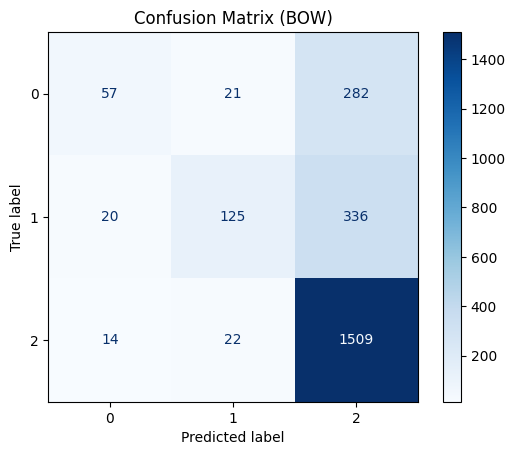

In [ ]:
# Train and evaluate for Bag of Words
train_and_evaluate_knn(X_train_BOW, y_train, X_test_BOW, y_test, feature_type="BOW")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Parameters for TF-IDF: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Training F1-Score (CV) for TF-IDF: 0.5774

Test Metrics for TF-IDF:
              precision    recall  f1-score   support

           0       0.52      0.33      0.40       360
           1       0.69      0.39      0.50       481
           2       0.76      0.93      0.84      1545

    accuracy                           0.73      2386
   macro avg       0.66      0.55      0.58      2386
weighted avg       0.71      0.73      0.70      2386



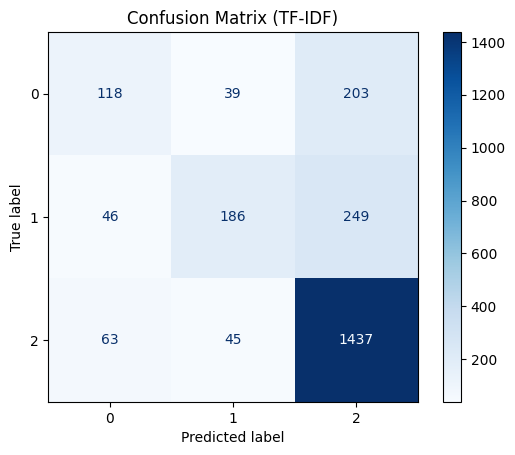

In [ ]:
# Train and evaluate for TF-IDF
train_and_evaluate_knn(X_train_tfidf, y_train, X_test_tfidf, y_test, feature_type="TF-IDF")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Parameters for W2V: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Training F1-Score (CV) for W2V: 0.5088

Test Metrics for W2V:
              precision    recall  f1-score   support

           0       0.34      0.29      0.31       360
           1       0.41      0.38      0.39       481
           2       0.75      0.79      0.77      1545

    accuracy                           0.63      2386
   macro avg       0.50      0.49      0.49      2386
weighted avg       0.62      0.63      0.63      2386



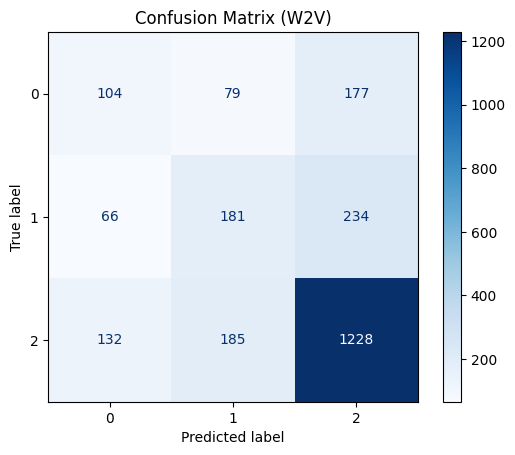

In [ ]:
# Train and evaluate for Word2Vec
train_and_evaluate_knn(X_train_W2V, y_train, X_test_W2V, y_test, feature_type="W2V")

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, ConfusionMatrixDisplay

def train_and_evaluate_logistic_regression(X_train, y_train, X_test, y_test, feature_type="BOW"):

    # Define Logistic Regression parameter grid
    param_grid = {
        'C': [0.1, 1, 10],  # Regularization strength
        'penalty': ['l2', 'none'],  # Regularization type
        'solver': ['lbfgs', 'saga']  # Solvers compatible with the penalties
    }

    # Initialize Logistic Regression classifier
    log_reg = LogisticRegression(max_iter=1000)

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(
        estimator=log_reg,
        param_grid=param_grid,
        scoring='f1_macro',
        cv=5,
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    # Best parameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    print(f"\nBest Parameters for {feature_type}: {best_params}")

    # Evaluate on the training set using cross-validation
    train_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1_macro')
    print(f"Training F1-Score (CV) for {feature_type}: {np.mean(train_scores):.4f}")

    # Evaluate on the test set
    y_pred = best_model.predict(X_test)
    print(f"\nTest Metrics for {feature_type}:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix for the test set
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix ({feature_type})")
    plt.show()

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Parameters for BOW: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Training F1-Score (CV) for BOW: 0.6710

Test Metrics for BOW:
              precision    recall  f1-score   support

           0       0.66      0.44      0.53       360
           1       0.72      0.56      0.63       481
           2       0.80      0.92      0.86      1545

    accuracy                           0.77      2386
   macro avg       0.73      0.64      0.67      2386
weighted avg       0.76      0.77      0.76      2386



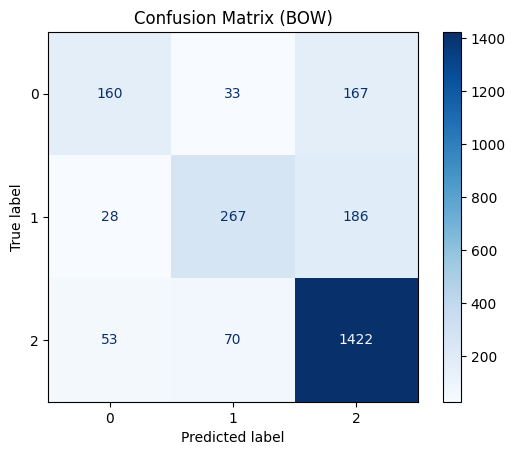

In [ ]:
# Train and evaluate for Bag of Words
train_and_evaluate_logistic_regression(X_train_BOW, y_train, X_test_BOW, y_test, feature_type="BOW")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Parameters for TF-IDF: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Training F1-Score (CV) for TF-IDF: 0.6679

Test Metrics for TF-IDF:
              precision    recall  f1-score   support

           0       0.66      0.46      0.54       360
           1       0.71      0.58      0.64       481
           2       0.81      0.91      0.86      1545

    accuracy                           0.78      2386
   macro avg       0.73      0.65      0.68      2386
weighted avg       0.77      0.78      0.76      2386



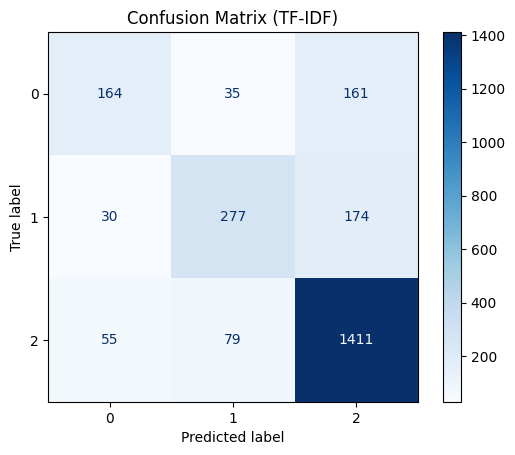

In [ ]:
# Train and evaluate for TF-IDF
train_and_evaluate_logistic_regression(X_train_tfidf, y_train, X_test_tfidf, y_test, feature_type="TF-IDF")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Parameters for W2V: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Training F1-Score (CV) for W2V: 0.3803

Test Metrics for W2V:
              precision    recall  f1-score   support

           0       0.31      0.04      0.07       360
           1       0.42      0.18      0.25       481
           2       0.69      0.95      0.79      1545

    accuracy                           0.65      2386
   macro avg       0.47      0.39      0.37      2386
weighted avg       0.57      0.65      0.58      2386



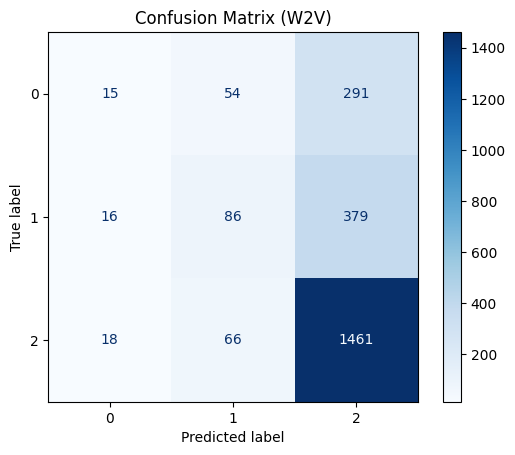

In [ ]:
# Train and evaluate for Word2Vec
train_and_evaluate_logistic_regression(X_train_W2V, y_train, X_test_W2V, y_test, feature_type="W2V")

### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, ConfusionMatrixDisplay

def train_and_evaluate_mlp(X_train, y_train, X_test, y_test, feature_type="BOW"):

    # Define MLP parameter grid
    param_grid = {
        'hidden_layer_sizes': [(5,), (5, 5)],  # Single and two-layer configurations
        'activation': ['relu', 'tanh'],  # Activation functions
        'solver': ['adam', 'sgd'],  # Optimization algorithms
        'alpha': [0.0001, 0.001]  # L2 regularization
    }

    # Initialize MLP classifier
    mlp = MLPClassifier(max_iter=500)

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(
        estimator=mlp,
        param_grid=param_grid,
        scoring='f1_macro',
        cv=5,
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    # Best parameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    print(f"\nBest Parameters for {feature_type}: {best_params}")

    # Evaluate on the training set using cross-validation
    train_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1_macro')
    print(f"Training F1-Score (CV) for {feature_type}: {np.mean(train_scores):.4f}")

    # Evaluate on the test set
    y_pred = best_model.predict(X_test)
    print(f"\nTest Metrics for {feature_type}:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix for the test set
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix ({feature_type})")
    plt.show()

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Parameters for BOW: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (5,), 'solver': 'sgd'}
Training F1-Score (CV) for BOW: 0.6646

Test Metrics for BOW:
              precision    recall  f1-score   support

           0       0.67      0.47      0.55       360
           1       0.70      0.56      0.62       481
           2       0.81      0.91      0.86      1545

    accuracy                           0.77      2386
   macro avg       0.73      0.65      0.68      2386
weighted avg       0.76      0.77      0.76      2386



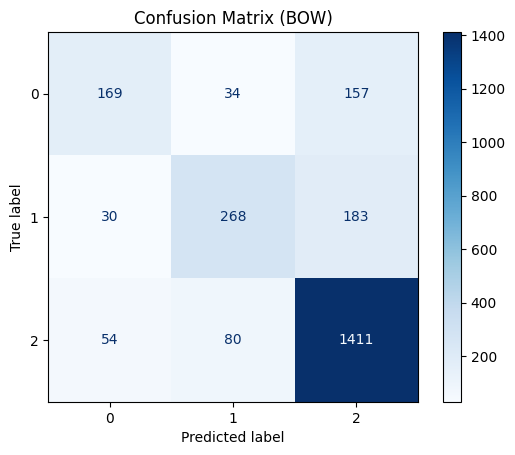

In [ ]:
# Train and evaluate for Bag of Words
train_and_evaluate_mlp(X_train_BOW, y_train, X_test_BOW, y_test, feature_type="BOW")

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Parameters for TF-IDF: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (5,), 'solver': 'adam'}
Training F1-Score (CV) for TF-IDF: 0.6629

Test Metrics for TF-IDF:
              precision    recall  f1-score   support

           0       0.53      0.49      0.51       360
           1       0.63      0.62      0.63       481
           2       0.82      0.84      0.83      1545

    accuracy                           0.75      2386
   macro avg       0.66      0.65      0.66      2386
weighted avg       0.74      0.75      0.74      2386



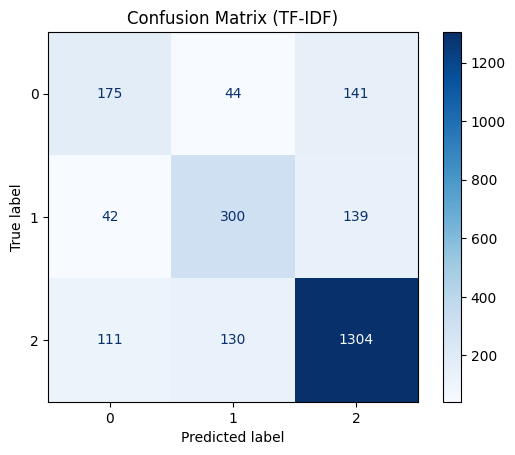

In [ ]:
# Train and evaluate for TF-IDF
train_and_evaluate_mlp(X_train_tfidf, y_train, X_test_tfidf, y_test, feature_type="TF-IDF")

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Parameters for W2V: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (5, 5), 'solver': 'adam'}
Training F1-Score (CV) for W2V: 0.4437

Test Metrics for W2V:
              precision    recall  f1-score   support

           0       0.43      0.06      0.10       360
           1       0.44      0.30      0.35       481
           2       0.71      0.92      0.80      1545

    accuracy                           0.67      2386
   macro avg       0.53      0.43      0.42      2386
weighted avg       0.61      0.67      0.61      2386



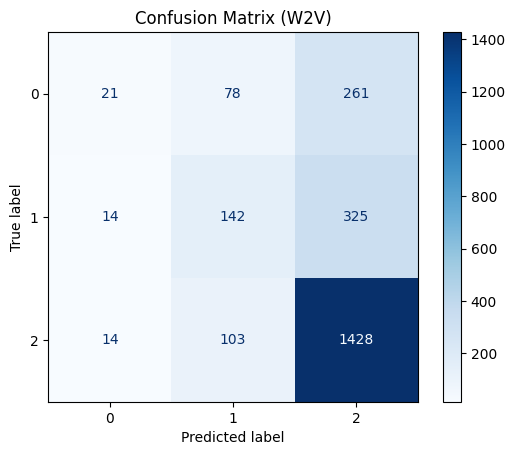

In [ ]:
# Train and evaluate for Word2Vec
train_and_evaluate_mlp(X_train_W2V, y_train, X_test_W2V, y_test, feature_type="W2V")

### Transformers - Using "Clean_text" as input for the tokenization process

#### Bert Classification Model

##### Creating the Model

In [ ]:
# model = BertForSequenceClassification.from_pretrained(config.pretrained_model,
#                                                       num_labels=3,
#                                                       output_attentions=False,
#                                                       output_hidden_states=False)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##### Data Loaders

In [ ]:
# from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# dataloader_train = DataLoader(df_train_bert,
#                               sampler=RandomSampler(df_train_bert),
#                               batch_size=config.batch_size)

# dataloader_validation = DataLoader(df_val_bert,
#                                    sampler=SequentialSampler(df_val_bert),
#                                    batch_size=config.batch_size)

##### Optimizer & Scheduler

In [ ]:
# from transformers import AdamW, get_linear_schedule_with_warmup

# optimizer = AdamW(model.parameters(),
#                   lr=config.lr,
#                   eps=config.eps)


# scheduler = get_linear_schedule_with_warmup(optimizer,
#                                             num_warmup_steps=0,
#                                             num_training_steps=len(dataloader_train)*config.epochs)

##### Performance Metrics

In [ ]:
# from sklearn.metrics import f1_score

# def f1_score_func(preds, labels):
#     preds_flat = np.argmax(preds, axis=1).flatten()
#     labels_flat = labels.flatten()
#     return f1_score(labels_flat, preds_flat, average='weighted')

# def accuracy_per_class(preds, labels, label_dict):
#     label_dict_inverse = {v: k for k, v in label_dict.items()}

#     preds_flat = np.argmax(preds, axis=1).flatten()
#     labels_flat = labels.flatten()

#     for label in np.unique(labels_flat):
#         y_preds = preds_flat[labels_flat==label]
#         y_true = labels_flat[labels_flat==label]
#         print(f'Class: {label_dict_inverse[label]}')
#         print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

##### Training Loop

In [ ]:
# # Training Loop

# def evaluate(dataloader_val):

#     model.eval()

#     loss_val_total = 0
#     predictions, true_vals = [], []

#     for batch in dataloader_val:

#         batch = tuple(b.to(config.device) for b in batch)

#         inputs = {'input_ids':      batch[0],
#                   'attention_mask': batch[1],
#                   'labels':         batch[2],
#                  }

#         with torch.no_grad():
#             outputs = model(**inputs)

#         loss = outputs[0]
#         logits = outputs[1]
#         loss_val_total += loss.item()

#         logits = logits.detach().cpu().numpy()
#         label_ids = inputs['labels'].cpu().numpy()
#         predictions.append(logits)
#         true_vals.append(label_ids)

#     # calculate avareage val loss
#     loss_val_avg = loss_val_total/len(dataloader_val)

#     predictions = np.concatenate(predictions, axis=0)
#     true_vals = np.concatenate(true_vals, axis=0)

#     return loss_val_avg, predictions, true_vals

In [ ]:
# model.to(config.device)

# for epoch in tqdm(range(1, config.epochs+1)):

#     model.train()

#     loss_train_total = 0
#     # allows you to see the progress of the training
#     progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)

#     for batch in progress_bar:

#         model.zero_grad()

#         batch = tuple(b.to(config.device) for b in batch)


#         inputs = {'input_ids':      batch[0],
#                   'attention_mask': batch[1],
#                   'labels':         batch[2],
#                  }

#         outputs = model(**inputs)

#         loss = outputs[0]
#         loss_train_total += loss.item()
#         loss.backward()

#         torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

#         optimizer.step()
#         scheduler.step()

#         progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


#     torch.save(model.state_dict(), f'_BERT_epoch_{epoch}.model')

#     tqdm.write(f'\nEpoch {epoch}')

#     loss_train_avg = loss_train_total/len(dataloader_train)
#     tqdm.write(f'Training loss: {loss_train_avg}')

#     val_loss, predictions, true_vals = evaluate(dataloader_validation)
#     val_f1 = f1_score_func(predictions, true_vals)
#     tqdm.write(f'Validation loss: {val_loss}')

#     tqdm.write(f'F1 Score (Weighted): {val_f1}');
# # save model params and other configs
# with Path('params.json').open("w") as f:
#     json.dump(params, f, ensure_ascii=False, indent=4)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.6143924732413846
Validation loss: 0.519713460888957
F1 Score (Weighted): 0.8105938731591493


Epoch 2:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.39786317680098976
Validation loss: 0.6011131460118533
F1 Score (Weighted): 0.8291525885746858


Epoch 3:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.23972127038973
Validation loss: 0.8353655923584397
F1 Score (Weighted): 0.8317953621022278


Epoch 4:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.14402506604039014
Validation loss: 0.9797394616386312
F1 Score (Weighted): 0.8350971200772035


Epoch 5:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.0767932255249447
Validation loss: 1.0554126573182263
F1 Score (Weighted): 0.833068640075692


##### Test on the Validation Set

In [ ]:
# model.load_state_dict(torch.load(f'./_BERT_epoch_1.model', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
# from sklearn.metrics import classification_report

# preds_flat = np.argmax(predictions, axis=1).flatten()
# print(classification_report(preds_flat, true_vals))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69       357
           1       0.71      0.80      0.75       425
           2       0.91      0.88      0.89      1604

    accuracy                           0.83      2386
   macro avg       0.77      0.79      0.78      2386
weighted avg       0.84      0.83      0.84      2386



#### Roberta Classification Model

##### Creating the Model

In [ ]:
# from transformers import RobertaForSequenceClassification

# # Initialize RoBERTa model
# model = RobertaForSequenceClassification.from_pretrained(
#     "roberta-base",
#     num_labels=3,  # Number of output classes (e.g., Bearish, Neutral, Bullish)
#     output_attentions=False,
#     output_hidden_states=False
# )

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##### Data Loaders

In [ ]:
# from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# dataloader_train = DataLoader(df_train_bert,
#                               sampler=RandomSampler(df_train_bert),
#                               batch_size=config.batch_size)

# dataloader_validation = DataLoader(df_val_bert,
#                                    sampler=SequentialSampler(df_val_bert),
#                                    batch_size=config.batch_size)

##### Optimizer and Scheduler

In [ ]:
# from transformers import AdamW, get_linear_schedule_with_warmup

# optimizer = AdamW(model.parameters(), lr=config.lr, eps=config.eps)

# scheduler = get_linear_schedule_with_warmup(
#     optimizer,
#     num_warmup_steps=0,
#     num_training_steps=len(dataloader_train) * config.epochs
# )

##### Performance Metrics

In [ ]:
# from sklearn.metrics import f1_score

# def f1_score_func(preds, labels):
#     preds_flat = np.argmax(preds, axis=1).flatten()
#     labels_flat = labels.flatten()
#     return f1_score(labels_flat, preds_flat, average='weighted')

# def accuracy_per_class(preds, labels, label_dict):
#     label_dict_inverse = {v: k for k, v in label_dict.items()}

#     preds_flat = np.argmax(preds, axis=1).flatten()
#     labels_flat = labels.flatten()

#     for label in np.unique(labels_flat):
#         y_preds = preds_flat[labels_flat==label]
#         y_true = labels_flat[labels_flat==label]
#         print(f'Class: {label_dict_inverse[label]}')
#         print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

##### Training Loop

In [ ]:
# from sklearn.metrics import f1_score, classification_report

# def evaluate(dataloader_val):
#     model.eval()

#     loss_val_total = 0
#     predictions, true_vals = [], []

#     for batch in dataloader_val:
#         batch = tuple(b.to(config.device) for b in batch)

#         inputs = {
#             "input_ids": batch[0],
#             "attention_mask": batch[1],
#             "labels": batch[2],
#         }

#         with torch.no_grad():
#             outputs = model(**inputs)
#             loss = outputs.loss
#             logits = outputs.logits

#         loss_val_total += loss.item()
#         logits = logits.detach().cpu().numpy()
#         label_ids = inputs["labels"].cpu().numpy()

#         predictions.append(logits)
#         true_vals.append(label_ids)

#     loss_val_avg = loss_val_total / len(dataloader_val)

#     predictions = np.concatenate(predictions, axis=0)
#     true_vals = np.concatenate(true_vals, axis=0)

#     return loss_val_avg, predictions, true_vals

In [ ]:
# model.to(config.device)

# for epoch in tqdm(range(1, config.epochs + 1)):
#     model.train()
#     loss_train_total = 0

#     progress_bar = tqdm(dataloader_train, desc=f"Epoch {epoch}", leave=False, disable=False)

#     for batch in progress_bar:
#         model.zero_grad()

#         batch = tuple(b.to(config.device) for b in batch)

#         inputs = {
#             "input_ids": batch[0],
#             "attention_mask": batch[1],
#             "labels": batch[2],
#         }

#         outputs = model(**inputs)
#         loss = outputs.loss
#         logits = outputs.logits

#         loss_train_total += loss.item()
#         loss.backward()

#         torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
#         optimizer.step()
#         scheduler.step()

#         progress_bar.set_postfix({"training_loss": f"{loss.item() / len(batch):.3f}"})

#     torch.save(model.state_dict(), f"Roberta_epoch_{epoch}.model")

#     print(f"\nEpoch {epoch}")
#     loss_train_avg = loss_train_total / len(dataloader_train)
#     print(f"Training Loss: {loss_train_avg}")

#     val_loss, predictions, true_vals = evaluate(dataloader_validation)
#     val_f1 = f1_score(np.argmax(predictions, axis=1), true_vals, average="weighted")
#     print(f"Validation Loss: {val_loss}")
#     print(f"F1 Score (Weighted): {val_f1}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 1
Training Loss: 0.5492622903384243
Validation Loss: 0.5738093316257843
F1 Score (Weighted): 0.83388928522346


Epoch 2:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 2
Training Loss: 0.36709772938435425
Validation Loss: 0.5798786580316891
F1 Score (Weighted): 0.8483945639776568


Epoch 3:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 3
Training Loss: 0.24309779435198298
Validation Loss: 0.6161770909222021
F1 Score (Weighted): 0.873194105963247


Epoch 4:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 4
Training Loss: 0.1340119943381537
Validation Loss: 0.646588742378052
F1 Score (Weighted): 0.8936535733100877


Epoch 5:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 5
Training Loss: 0.08307083353010342
Validation Loss: 0.7213520628031999
F1 Score (Weighted): 0.8907864503722694


##### Test on the Validation Set

In [ ]:
# # Load the trained RoBERTa model
# model.load_state_dict(
#     torch.load(f'./Roberta_epoch_1.model', map_location=torch.device('cpu'))
# )
# print("<All keys matched successfully>")

<All keys matched successfully>


In [ ]:
# from sklearn.metrics import classification_report

# preds_flat = np.argmax(predictions, axis=1).flatten()
# print(classification_report(preds_flat, true_vals))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82       390
           1       0.85      0.85      0.85       481
           2       0.91      0.93      0.92      1515

    accuracy                           0.89      2386
   macro avg       0.87      0.86      0.86      2386
weighted avg       0.89      0.89      0.89      2386



### Transformers - Using "text" as input for the tokenization process

#### Bert Classification Model

##### Creating the Model

In [ ]:
# model = BertForSequenceClassification.from_pretrained(config.pretrained_model,
#                                                       num_labels=3,
#                                                       output_attentions=False,
#                                                       output_hidden_states=False)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##### Data Loaders

In [ ]:
# from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# dataloader_train = DataLoader(df_train_bert,
#                               sampler=RandomSampler(df_train_bert),
#                               batch_size=config.batch_size)

# dataloader_validation = DataLoader(df_val_bert,
#                                    sampler=SequentialSampler(df_val_bert),
#                                    batch_size=config.batch_size)

##### Optimizer & Scheduler

In [ ]:
# from transformers import AdamW, get_linear_schedule_with_warmup

# optimizer = AdamW(model.parameters(),
#                   lr=config.lr,
#                   eps=config.eps)


# scheduler = get_linear_schedule_with_warmup(optimizer,
#                                             num_warmup_steps=0,
#                                             num_training_steps=len(dataloader_train)*config.epochs)

##### Performance Metrics

In [ ]:
# from sklearn.metrics import f1_score

# def f1_score_func(preds, labels):
#     preds_flat = np.argmax(preds, axis=1).flatten()
#     labels_flat = labels.flatten()
#     return f1_score(labels_flat, preds_flat, average='weighted')

# def accuracy_per_class(preds, labels, label_dict):
#     label_dict_inverse = {v: k for k, v in label_dict.items()}

#     preds_flat = np.argmax(preds, axis=1).flatten()
#     labels_flat = labels.flatten()

#     for label in np.unique(labels_flat):
#         y_preds = preds_flat[labels_flat==label]
#         y_true = labels_flat[labels_flat==label]
#         print(f'Class: {label_dict_inverse[label]}')
#         print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

##### Training Loop

In [ ]:
# # Training Loop

# def evaluate(dataloader_val):

#     model.eval()

#     loss_val_total = 0
#     predictions, true_vals = [], []

#     for batch in dataloader_val:

#         batch = tuple(b.to(config.device) for b in batch)

#         inputs = {'input_ids':      batch[0],
#                   'attention_mask': batch[1],
#                   'labels':         batch[2],
#                  }

#         with torch.no_grad():
#             outputs = model(**inputs)

#         loss = outputs[0]
#         logits = outputs[1]
#         loss_val_total += loss.item()

#         logits = logits.detach().cpu().numpy()
#         label_ids = inputs['labels'].cpu().numpy()
#         predictions.append(logits)
#         true_vals.append(label_ids)

#     # calculate avareage val loss
#     loss_val_avg = loss_val_total/len(dataloader_val)

#     predictions = np.concatenate(predictions, axis=0)
#     true_vals = np.concatenate(true_vals, axis=0)

#     return loss_val_avg, predictions, true_vals

In [ ]:
# model.to(config.device)

# for epoch in tqdm(range(1, config.epochs+1)):

#     model.train()

#     loss_train_total = 0
#     # allows you to see the progress of the training
#     progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)

#     for batch in progress_bar:

#         model.zero_grad()

#         batch = tuple(b.to(config.device) for b in batch)


#         inputs = {'input_ids':      batch[0],
#                   'attention_mask': batch[1],
#                   'labels':         batch[2],
#                  }

#         outputs = model(**inputs)

#         loss = outputs[0]
#         loss_train_total += loss.item()
#         loss.backward()

#         torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

#         optimizer.step()
#         scheduler.step()

#         progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


#     torch.save(model.state_dict(), f'_BERT_epoch_{epoch}.model')

#     tqdm.write(f'\nEpoch {epoch}')

#     loss_train_avg = loss_train_total/len(dataloader_train)
#     tqdm.write(f'Training loss: {loss_train_avg}')

#     val_loss, predictions, true_vals = evaluate(dataloader_validation)
#     val_f1 = f1_score_func(predictions, true_vals)
#     tqdm.write(f'Validation loss: {val_loss}')

#     tqdm.write(f'F1 Score (Weighted): {val_f1}');
# # save model params and other configs
# with Path('params.json').open("w") as f:
#     json.dump(params, f, ensure_ascii=False, indent=4)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.6619921657291912
Validation loss: 0.5328105845343527
F1 Score (Weighted): 0.794524545952287


Epoch 2:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.4881832835413609
Validation loss: 0.642303965658174
F1 Score (Weighted): 0.8008729919104737


Epoch 3:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.38039709355755125
Validation loss: 0.6871939403696417
F1 Score (Weighted): 0.8063845572659947


Epoch 4:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.3145603730572795
Validation loss: 0.8029617253223249
F1 Score (Weighted): 0.803973725031536


Epoch 5:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.261596738187419
Validation loss: 0.8536645417296487
F1 Score (Weighted): 0.8084473140322588


##### Test on the Validation Set

In [ ]:
# model.load_state_dict(torch.load(f'./_BERT_epoch_1.model', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
# from sklearn.metrics import classification_report

# preds_flat = np.argmax(predictions, axis=1).flatten()
# print(classification_report(preds_flat, true_vals))

              precision    recall  f1-score   support

           0       0.57      0.69      0.63       301
           1       0.68      0.75      0.72       437
           2       0.91      0.85      0.88      1648

    accuracy                           0.81      2386
   macro avg       0.72      0.76      0.74      2386
weighted avg       0.83      0.81      0.82      2386



#### Roberta Classification Model

##### Creating the Model

In [ ]:
from transformers import RobertaForSequenceClassification

# Initialize RoBERTa model
model = RobertaForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=3,  # Number of output classes (e.g., Bearish, Neutral, Bullish)
    output_attentions=False,
    output_hidden_states=False
)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##### Data Loaders

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

dataloader_train = DataLoader(df_train_bert,
                              sampler=RandomSampler(df_train_bert),
                              batch_size=config.batch_size)

dataloader_validation = DataLoader(df_val_bert,
                                   sampler=SequentialSampler(df_val_bert),
                                   batch_size=config.batch_size)

##### Optimizer and Scheduler

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(), lr=config.lr, eps=config.eps)

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=len(dataloader_train) * config.epochs
)

##### Performance Metrics

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels, label_dict):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

##### Training Loop

In [ ]:
from sklearn.metrics import f1_score, classification_report

def evaluate(dataloader_val):
    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_val:
        batch = tuple(b.to(config.device) for b in batch)

        inputs = {
            "input_ids": batch[0],
            "attention_mask": batch[1],
            "labels": batch[2],
        }

        with torch.no_grad():
            outputs = model(**inputs)
            loss = outputs.loss
            logits = outputs.logits

        loss_val_total += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = inputs["labels"].cpu().numpy()

        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total / len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [ ]:
model.to(config.device)

for epoch in tqdm(range(1, config.epochs + 1)):
    model.train()
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc=f"Epoch {epoch}", leave=False, disable=False)

    for batch in progress_bar:
        model.zero_grad()

        batch = tuple(b.to(config.device) for b in batch)

        inputs = {
            "input_ids": batch[0],
            "attention_mask": batch[1],
            "labels": batch[2],
        }

        outputs = model(**inputs)
        loss = outputs.loss
        logits = outputs.logits

        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({"training_loss": f"{loss.item() / len(batch):.3f}"})

    torch.save(model.state_dict(), f"Roberta_epoch_{epoch}.model")

    print(f"\nEpoch {epoch}")
    loss_train_avg = loss_train_total / len(dataloader_train)
    print(f"Training Loss: {loss_train_avg}")

    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score(np.argmax(predictions, axis=1), true_vals, average="weighted")
    print(f"Validation Loss: {val_loss}")
    print(f"F1 Score (Weighted): {val_f1}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 1
Training Loss: 0.5492622903384243
Validation Loss: 0.5738093316257843
F1 Score (Weighted): 0.83388928522346


Epoch 2:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 2
Training Loss: 0.36709772938435425
Validation Loss: 0.5798786580316891
F1 Score (Weighted): 0.8483945639776568


Epoch 3:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 3
Training Loss: 0.24309779435198298
Validation Loss: 0.6161770909222021
F1 Score (Weighted): 0.873194105963247


Epoch 4:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 4
Training Loss: 0.1340119943381537
Validation Loss: 0.646588742378052
F1 Score (Weighted): 0.8936535733100877


Epoch 5:   0%|          | 0/1193 [00:00<?, ?it/s]


Epoch 5
Training Loss: 0.08307083353010342
Validation Loss: 0.7213520628031999
F1 Score (Weighted): 0.8907864503722694


##### Test on the Validation Set

In [ ]:
# Load the trained RoBERTa model
model.load_state_dict(
    torch.load(f'./Roberta_epoch_1.model', map_location=torch.device('cpu'))
)
print("<All keys matched successfully>")

<All keys matched successfully>


In [ ]:
from sklearn.metrics import classification_report

preds_flat = np.argmax(predictions, axis=1).flatten()
print(classification_report(preds_flat, true_vals))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82       390
           1       0.85      0.85      0.85       481
           2       0.91      0.93      0.92      1515

    accuracy                           0.89      2386
   macro avg       0.87      0.86      0.86      2386
weighted avg       0.89      0.89      0.89      2386



## 6.) Final Model Development and Predictions

### Tokenization for the final Training Data

In [ ]:
# Combine training and validation data
df_combined = pd.concat([df_train_clean, df_test_clean], ignore_index=True)

# Tokenize the combined dataset
encoded_data_combined = tokenizer.batch_encode_plus(
    df_combined["text"].values,
    add_special_tokens=config.add_special_tokens,
    return_attention_mask=config.return_attention_mask,
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length,
    return_tensors=config.return_tensors,
)

# Prepare combined dataset for training
input_ids_combined = encoded_data_combined['input_ids']
attention_masks_combined = encoded_data_combined['attention_mask']
labels_combined = torch.tensor(df_combined["label"].values)

df_combined_dataset = TensorDataset(input_ids_combined, attention_masks_combined, labels_combined)

### Tokenization for the final Test Data

In [ ]:
# Tokenize the test dataset
encoded_data_test = tokenizer.batch_encode_plus(
    final_test_clean["text"].values,
    add_special_tokens=config.add_special_tokens,
    return_attention_mask=config.return_attention_mask,
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length,
    return_tensors=config.return_tensors,
)

# Prepare test dataset for inference
input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']

df_test_dataset = TensorDataset(input_ids_test, attention_masks_test)
dataloader_test = DataLoader(df_test_dataset, batch_size=config.batch_size)

### Retraining the Final Roberta Model

In [ ]:
# Dataloader for the combined dataset
dataloader_combined = DataLoader(df_combined_dataset, sampler=RandomSampler(df_combined_dataset), batch_size=config.batch_size)

# Initialize the optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=config.lr, eps=config.eps)
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=len(dataloader_combined) * config.epochs,
)

# Training Loop

def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_val:

        batch = tuple(b.to(config.device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    # calculate avareage val loss
    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

# Retrain the model
model.to(config.device)
for epoch in range(1, config.epochs + 1):
    model.train()
    loss_train_total = 0
    progress_bar = tqdm(dataloader_combined, desc=f'Epoch {epoch}', leave=False)

    for batch in progress_bar:
        model.zero_grad()
        batch = tuple(b.to(config.device) for b in batch)
        inputs = {
            'input_ids': batch[0],
            'attention_mask': batch[1],
            'labels': batch[2],
        }
        outputs = model(**inputs)
        loss = outputs.loss
        loss_train_total += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    print(f"Epoch {epoch} | Training Loss: {loss_train_total / len(dataloader_combined)}")

# Save the retrained model
torch.save(model.state_dict(), 'Final_Roberta_retrained.model')

Epoch 1:   0%|          | 0/1591 [00:00<?, ?it/s]

Epoch 1 | Training Loss: 0.42923595304336015


Epoch 2:   0%|          | 0/1591 [00:00<?, ?it/s]

Epoch 2 | Training Loss: 0.2789354417620152


Epoch 3:   0%|          | 0/1591 [00:00<?, ?it/s]

Epoch 3 | Training Loss: 0.18140501001397794


Epoch 4:   0%|          | 0/1591 [00:00<?, ?it/s]

Epoch 4 | Training Loss: 0.10485714803274784


Epoch 5:   0%|          | 0/1591 [00:00<?, ?it/s]

Epoch 5 | Training Loss: 0.056724855656015816


### Applying the Model to the Final Test set

In [ ]:
# Load the retrained model
model.load_state_dict(torch.load('Final_Roberta_retrained.model', map_location=torch.device(config.device)))

# Make predictions on the test set
model.eval()
predictions = []

for batch in tqdm(dataloader_test, desc="Predicting on Test Set"):
    batch = tuple(b.to(config.device) for b in batch)
    inputs = {
        'input_ids': batch[0],
        'attention_mask': batch[1],
    }

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        predictions.extend(preds)

# Add predictions to the test dataframe
final_test_clean['predicted_label'] = predictions

Predicting on Test Set:   0%|          | 0/398 [00:00<?, ?it/s]

In [ ]:
# Checkpoint

submissions = final_test_clean.copy()

In [ ]:
# Preparing the submission predictions

submissions.drop(columns = ["clean_text", "text"], inplace = True)

submissions.set_index("id", inplace = True)

submissions.head()

,predicted_label
id,
0,1
1,2
2,2
3,1
4,2


In [ ]:
# Converting to csv

submissions.to_csv("/content/drive/MyDrive/Nova Ims/Text Mining/Predictions_09.csv")

In [ ]:
final_test_clean.head(20)

,id,clean_text,text,predicted_label
0,0,"etf asset surge tenfold 10 year $ 50 trillion , bank america predicts","ETF assets to surge tenfold in 10 years to $50 trillion, Bank of America predicts",1
1,1,’ hedge funds think evolution petroleum corporation ( epm ),Here’s What Hedge Funds Think Evolution Petroleum Corporation (EPM),2
2,2,$ pvh - phillips-van heusen q3 2020 earnings preview,$PVH - Phillips-Van Heusen Q3 2020 Earnings Preview https://t.co/kNhCYwVnBX,2
3,3,"china process waiving retaliatory tariff import u.s. pork soy domestic company , pro…","China is in the process of waiving retaliatory tariffs on imports of U.S. pork and soy by domestic companies, a pro… https://t.co/08mZU9TrBX",1
4,4,"highlight : “ growth scarce , investor seem willing pay growth stock `` @ pncbank's…","Highlight: “When growth is scarce, investors seem very willing to pay up for growth stock"" @PNCBank's… https://t.co/rO4fBOkBG9",2
5,5,marvell technology ( mrvl ) gains market dips : know - nasdaq,Marvell Technology (MRVL) Gains As Market Dips: What You Should Know - Nasdaq,1
6,6,update 1-italian airline alitalia 's rescue doubt atlantia backtracks,UPDATE 1-Italian airline Alitalia's rescue in doubt as Atlantia backtracks,0
7,7,macro fund shutting left right,why macro funds are shutting down left and right https://t.co/gVYowOBmqe,0
8,8,uber 's arrival caused binge drinking increase 21.8 % possible decrease drunk driving . 's lo…,Uber's arrival caused binge drinking to increase up to 21.8% and a possible decrease in drunk driving. Here's a lo… https://t.co/4h7tuhLp1B,2
9,9,new dungeons & dragons game announced,New Dungeons & Dragons game announced,2
